In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'piemonte'

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,1,Piemonte,2,0,2,1,3,0,0,...,0.0,0.0,0.0,0.0,0.00,66.67,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,1,Piemonte,2,0,2,1,3,0,0,...,0.0,15.0,0.0,0.0,0.00,66.67,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,1,Piemonte,2,0,2,0,2,-1,-1,...,0.0,0.0,0.0,-1.0,0.00,100.00,-inf,0.00,0.00,-33.33
3,2020-02-28T18:00:00,1,Piemonte,7,0,7,4,11,9,9,...,0.0,71.0,0.0,4.0,0.00,63.64,12.68,0.00,0.00,450.00
4,2020-02-29T17:00:00,1,Piemonte,7,0,7,4,11,0,0,...,0.0,81.0,0.0,0.0,0.00,63.64,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,2021-04-11T17:00:00,1,Piemonte,3606,320,3926,24446,28372,-301,1372,...,13.0,15834.0,5510.0,-270.0,8.15,13.84,8.66,24.90,-1.23,-1.05
412,2021-04-12T17:00:00,1,Piemonte,3633,317,3950,23711,27661,-711,636,...,30.0,13583.0,3021.0,-735.0,8.03,14.28,4.68,21.05,-0.94,-2.51
413,2021-04-13T17:00:00,1,Piemonte,3526,316,3842,22547,26389,-1272,1057,...,75.0,22670.0,6886.0,-1164.0,8.22,14.56,4.66,15.35,-0.32,-4.60
414,2021-04-14T17:00:00,1,Piemonte,3430,311,3741,21517,25258,-1131,1439,...,70.0,21986.0,7027.0,-1030.0,8.31,14.81,6.55,20.48,-1.58,-4.29


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 15, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1264
Nuovi tamponi: 21579.0
Percentuale nuovi positivi/nuovi tamponi: 5.8999999999999995 %
Nuovi guariti: 2155.0
Nuovi deceduti: 26.0
Variazione positivi ricoverati con sintomi: -118.0
Variazione positivi in terapia intensiva: 0.0
Variazione positivi in isolamento dimiciliare: -799.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 15, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-14T17:00:00,1,Piemonte,1913,140,2053,10308,12361,94,549,...,6.0,10990.0,4000.0,71.0,6.82,16.61,5.00,13.73,-0.71,0.77
1,2021-02-15T17:00:00,1,Piemonte,1933,144,2077,10249,12326,-35,438,...,14.0,10263.0,2851.0,-59.0,6.93,16.85,4.27,15.36,2.86,-0.28
2,2021-02-16T17:00:00,1,Piemonte,1900,141,2041,10185,12226,-100,771,...,37.0,18824.0,5806.0,-64.0,6.91,16.69,4.10,13.28,-2.08,-0.81
3,2021-02-17T17:00:00,1,Piemonte,1875,138,2013,10154,12167,-59,959,...,22.0,22151.0,7316.0,-31.0,6.86,16.54,4.33,13.11,-2.13,-0.48
4,2021-02-18T17:00:00,1,Piemonte,1866,128,1994,10012,12006,-161,501,...,16.0,14438.0,3561.0,-142.0,6.42,16.61,3.47,14.07,-7.25,-1.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-04-11T17:00:00,1,Piemonte,3606,320,3926,24446,28372,-301,1372,...,13.0,15834.0,5510.0,-270.0,8.15,13.84,8.66,24.90,-1.23,-1.05
57,2021-04-12T17:00:00,1,Piemonte,3633,317,3950,23711,27661,-711,636,...,30.0,13583.0,3021.0,-735.0,8.03,14.28,4.68,21.05,-0.94,-2.51
58,2021-04-13T17:00:00,1,Piemonte,3526,316,3842,22547,26389,-1272,1057,...,75.0,22670.0,6886.0,-1164.0,8.22,14.56,4.66,15.35,-0.32,-4.60
59,2021-04-14T17:00:00,1,Piemonte,3430,311,3741,21517,25258,-1131,1439,...,70.0,21986.0,7027.0,-1030.0,8.31,14.81,6.55,20.48,-1.58,-4.29


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

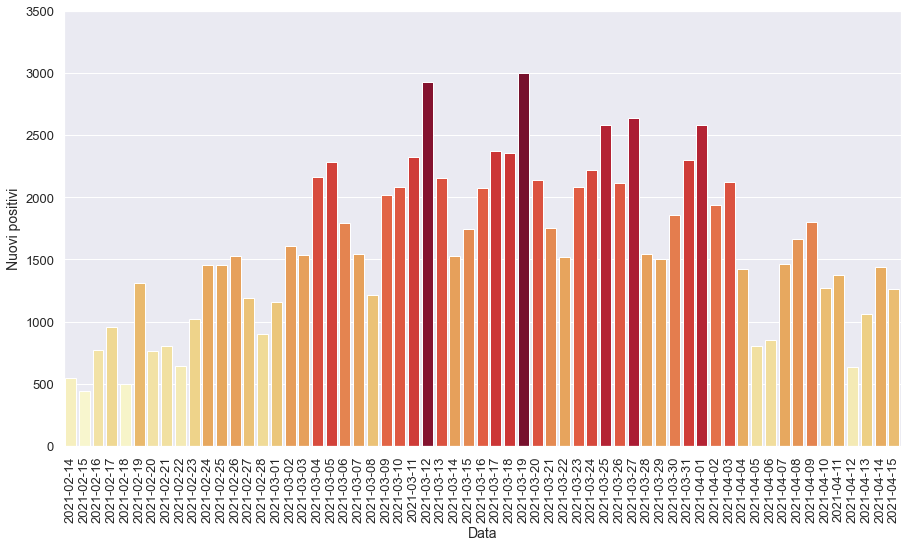

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

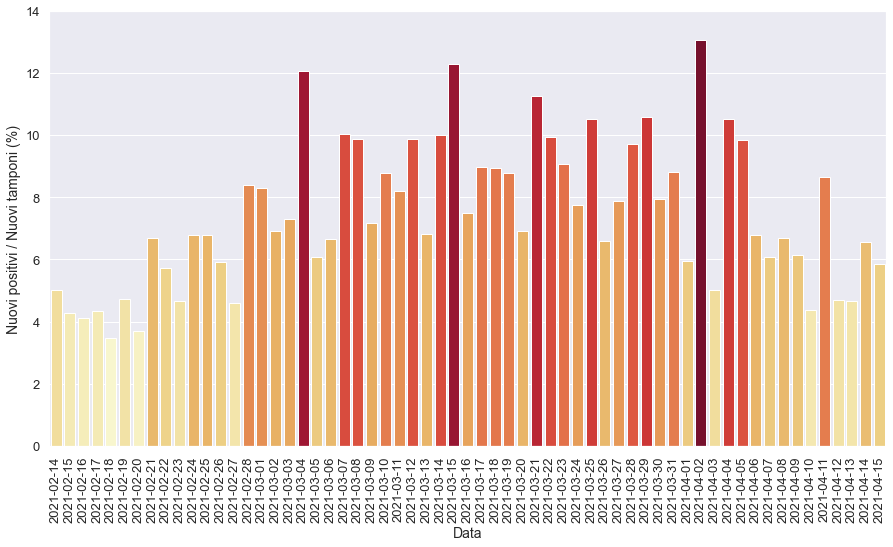

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

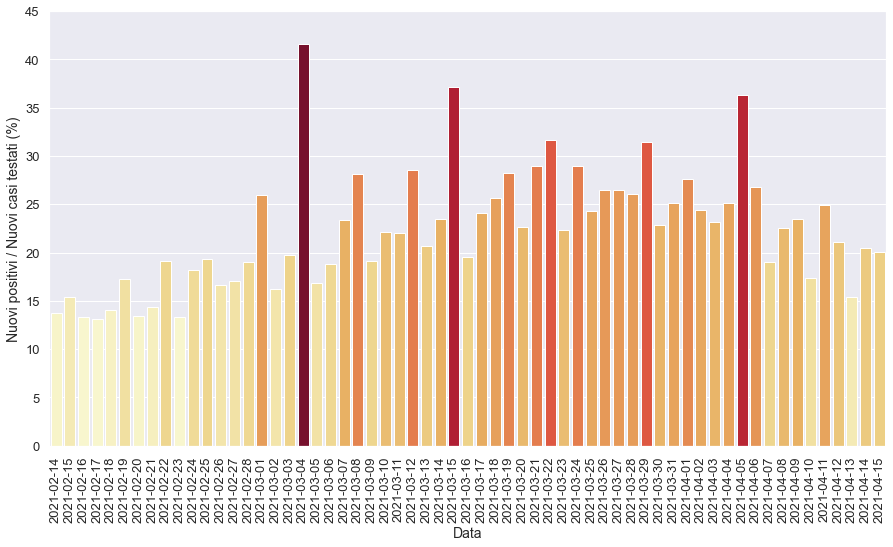

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

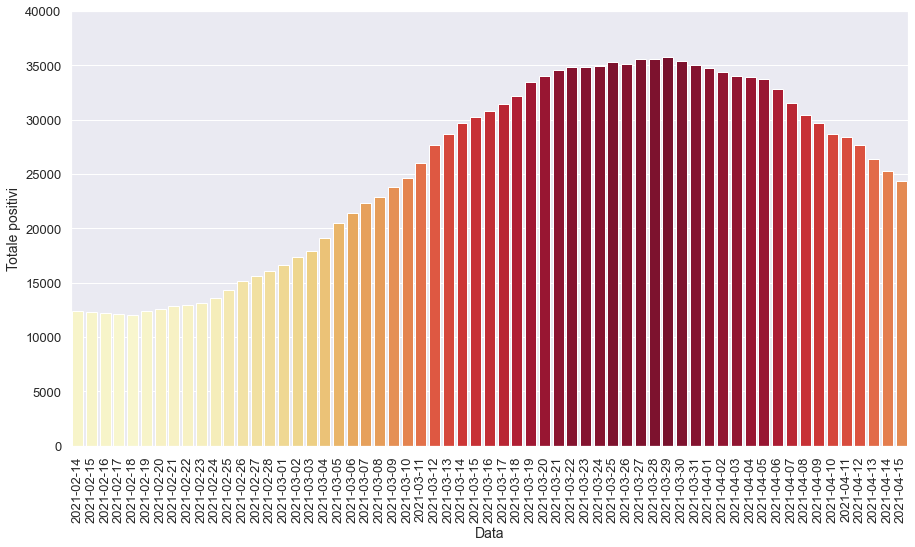

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

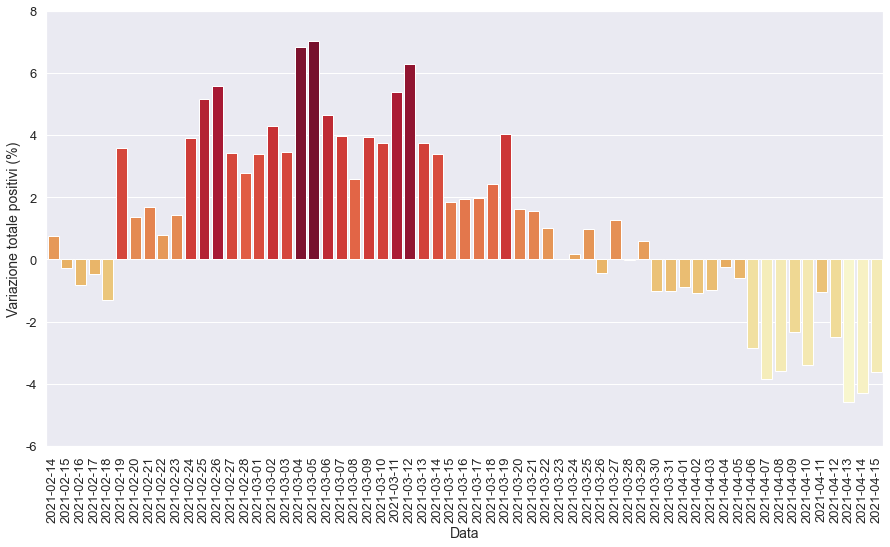

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

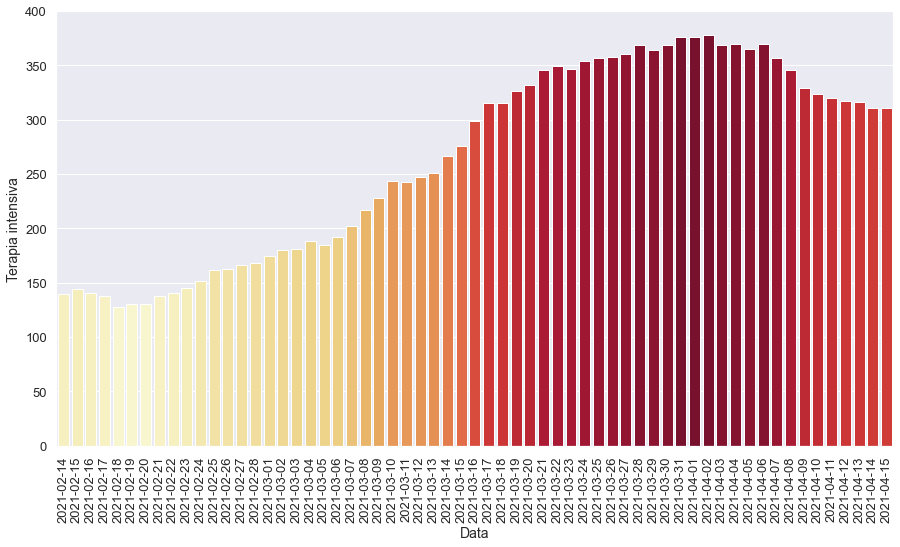

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

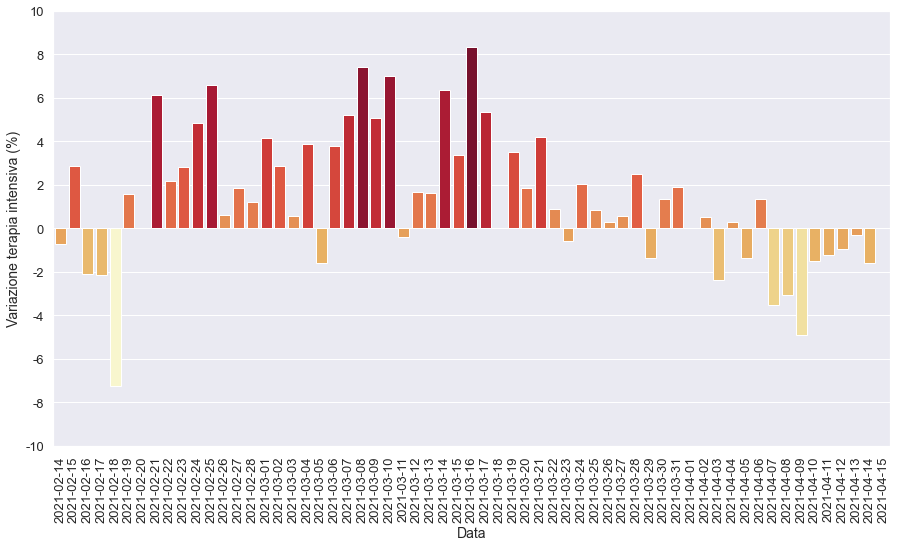

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

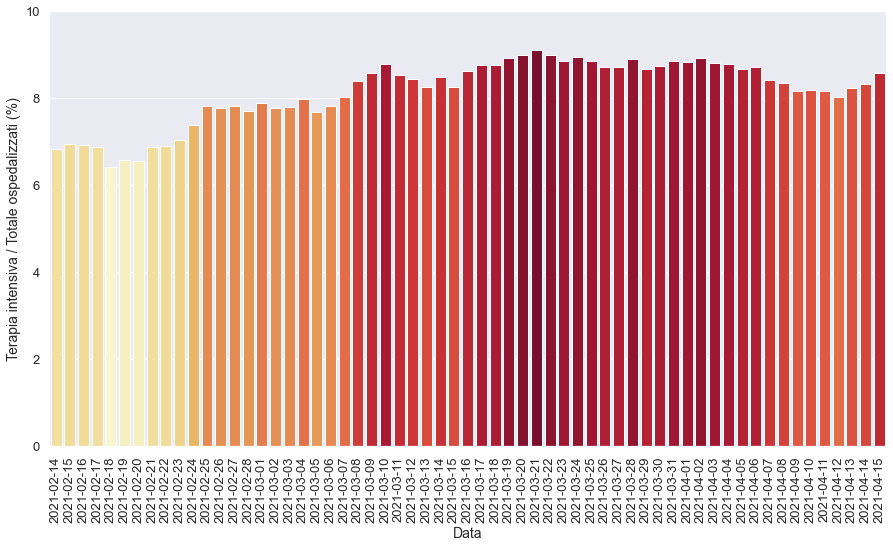

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

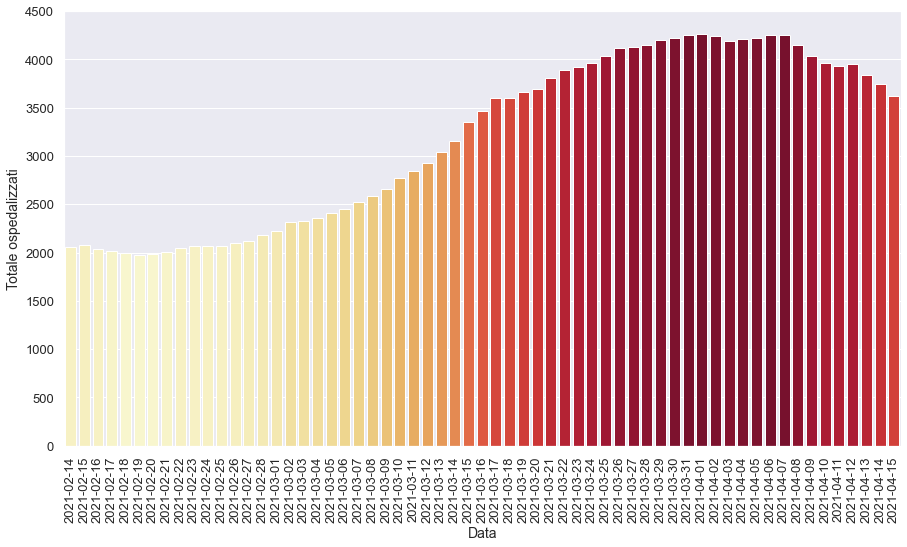

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

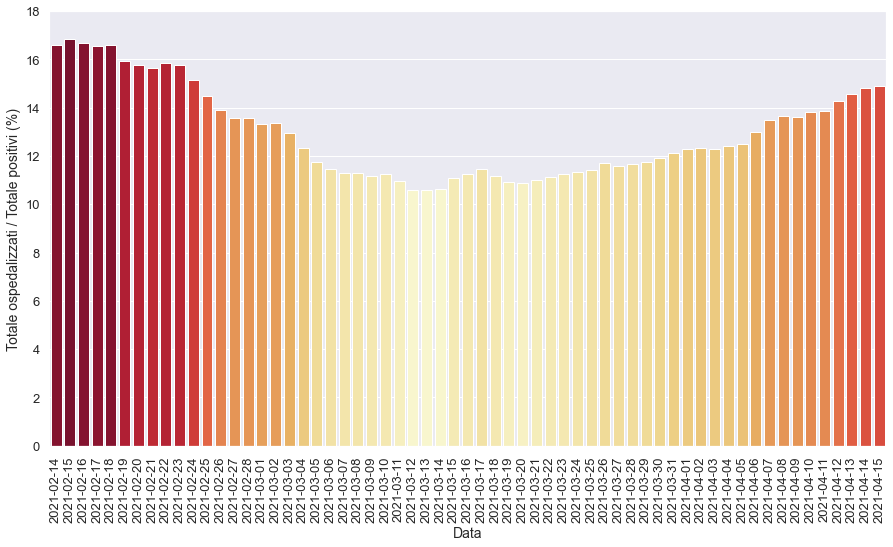

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

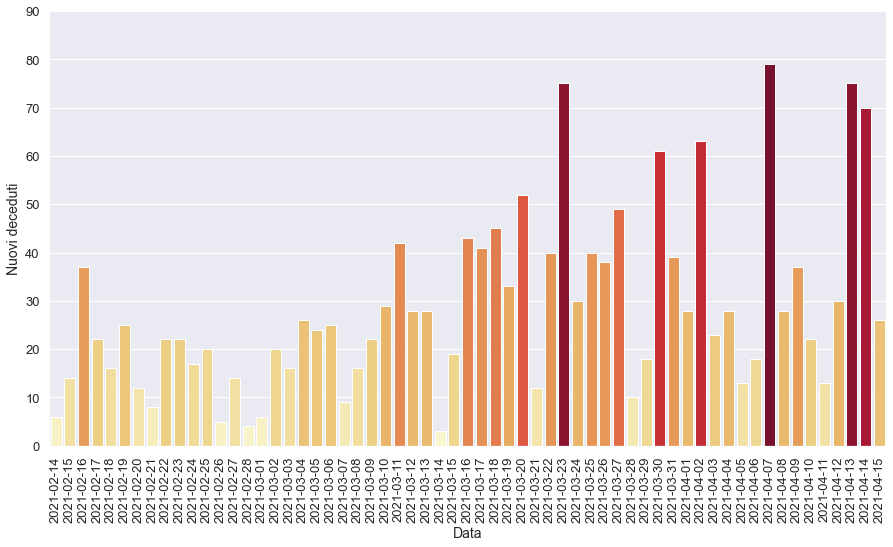

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

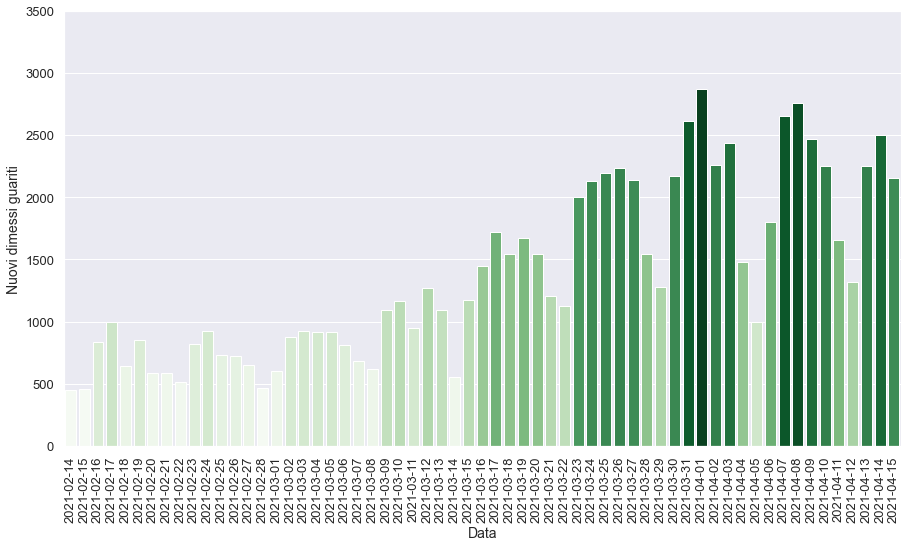

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-16T17:00:00,1,Piemonte,3169,299,3468,27316,30784,584,2074,...,43.0,27698.0,10613.0,462.0,8.62,11.27,7.49,19.54,8.33,1.93
1,2021-03-17T17:00:00,1,Piemonte,3281,315,3596,27798,31394,610,2374,...,41.0,26452.0,9876.0,482.0,8.76,11.45,8.97,24.04,5.35,1.98
2,2021-03-18T17:00:00,1,Piemonte,3279,315,3594,28566,32160,766,2357,...,45.0,26369.0,9186.0,768.0,8.76,11.18,8.94,25.66,0.00,2.44
3,2021-03-19T17:00:00,1,Piemonte,3332,326,3658,29797,33455,1295,2997,...,33.0,34152.0,10601.0,1231.0,8.91,10.93,8.78,28.27,3.49,4.03
4,2021-03-20T17:00:00,1,Piemonte,3361,332,3693,30304,33997,542,2141,...,52.0,31017.0,9454.0,507.0,8.99,10.86,6.90,22.65,1.84,1.62
5,2021-03-21T17:00:00,1,Piemonte,3455,346,3801,30730,34531,534,1751,...,12.0,15553.0,6054.0,426.0,9.10,11.01,11.26,28.92,4.22,1.57
6,2021-03-22T17:00:00,1,Piemonte,3536,349,3885,30998,34883,352,1521,...,40.0,15285.0,4799.0,268.0,8.98,11.14,9.95,31.69,0.87,1.02
7,2021-03-23T17:00:00,1,Piemonte,3572,347,3919,30964,34883,0,2080,...,75.0,22924.0,9329.0,-34.0,8.85,11.23,9.07,22.30,-0.57,0.00
8,2021-03-24T17:00:00,1,Piemonte,3608,354,3962,30986,34948,65,2223,...,30.0,28731.0,7684.0,22.0,8.93,11.34,7.74,28.93,2.02,0.19
9,2021-03-25T17:00:00,1,Piemonte,3677,357,4034,31258,35292,344,2582,...,40.0,24575.0,10611.0,272.0,8.85,11.43,10.51,24.33,0.85,0.98


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

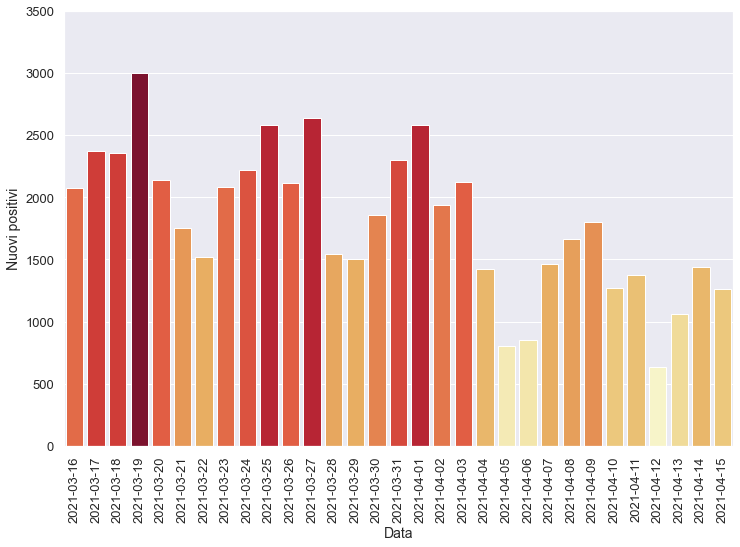

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

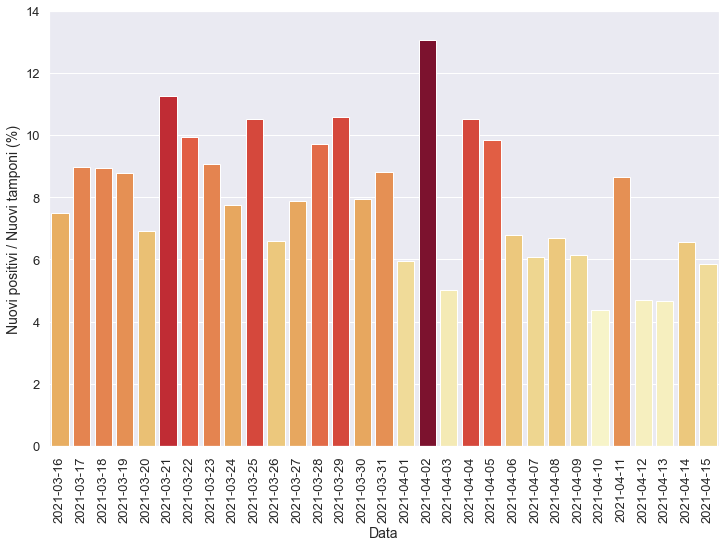

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

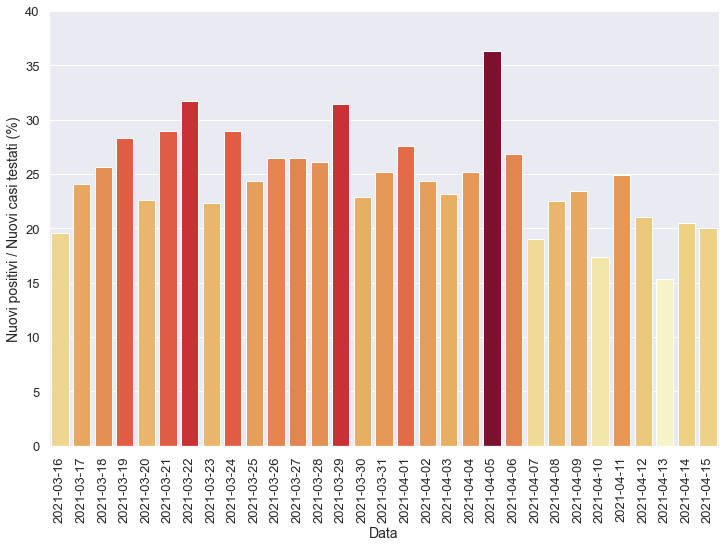

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

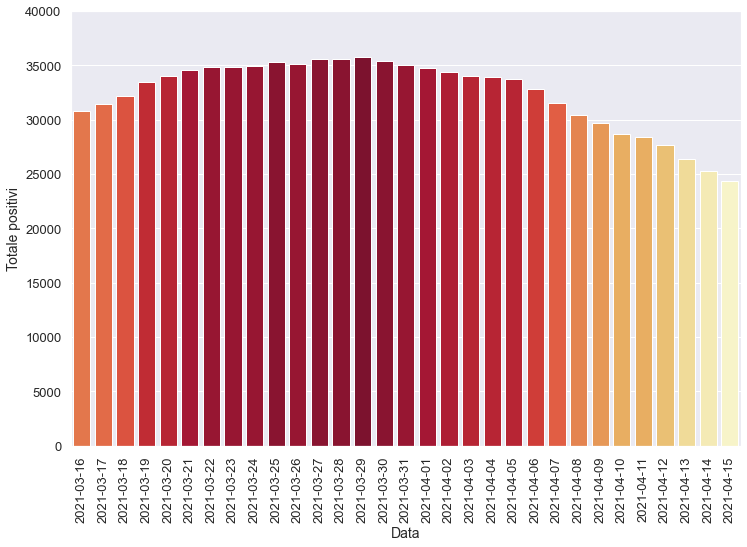

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

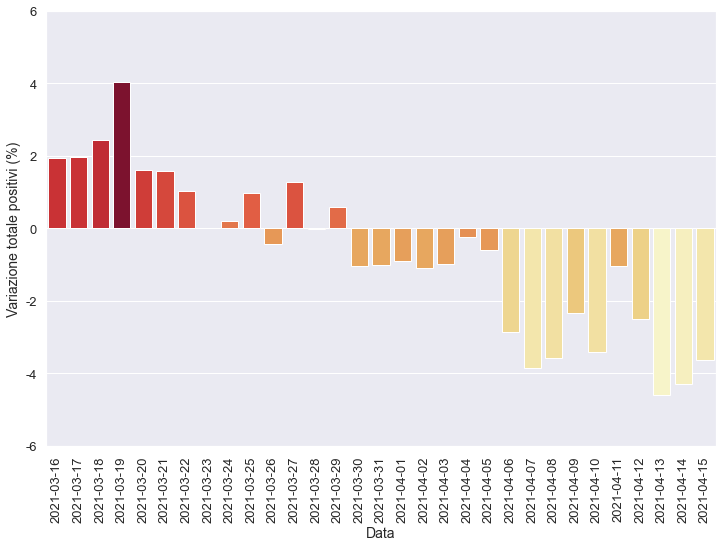

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

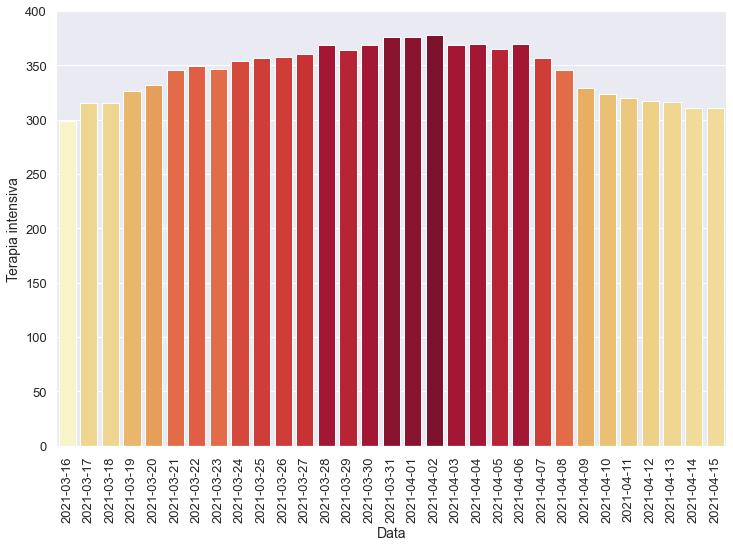

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

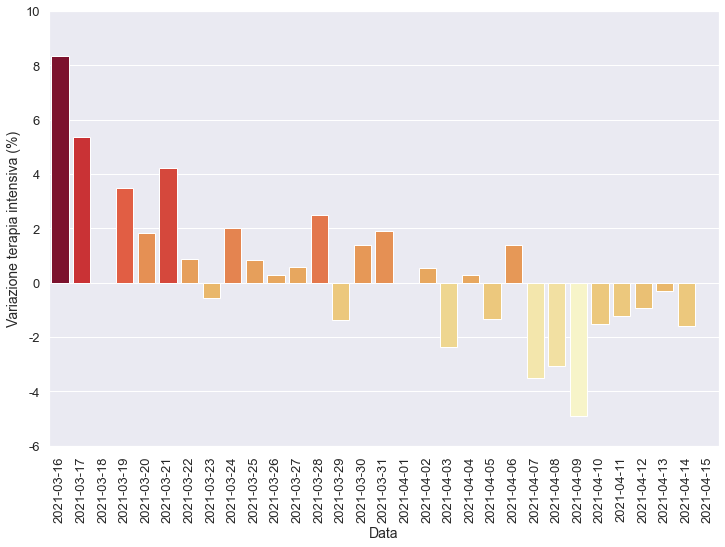

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

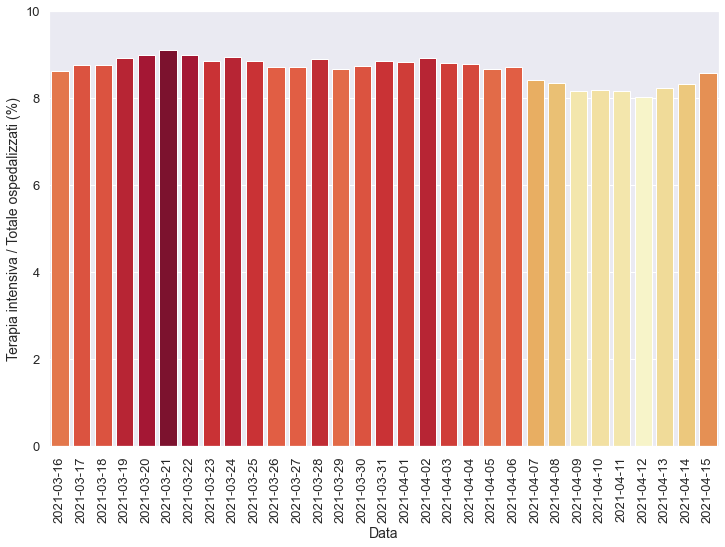

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

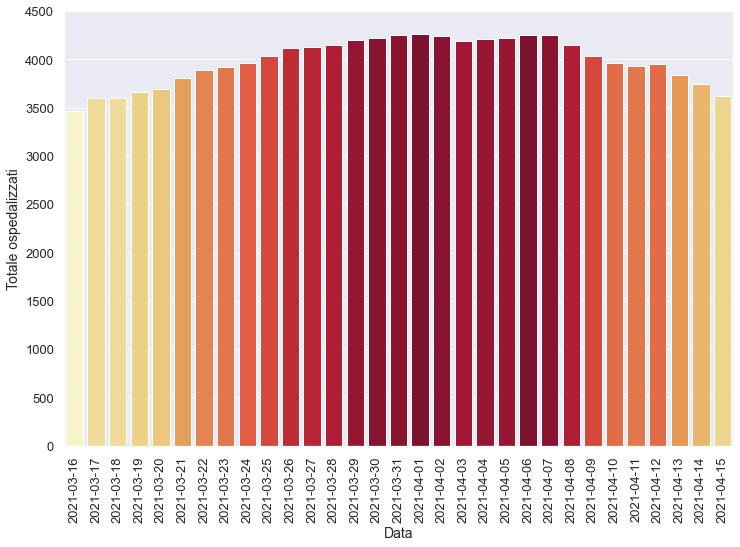

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

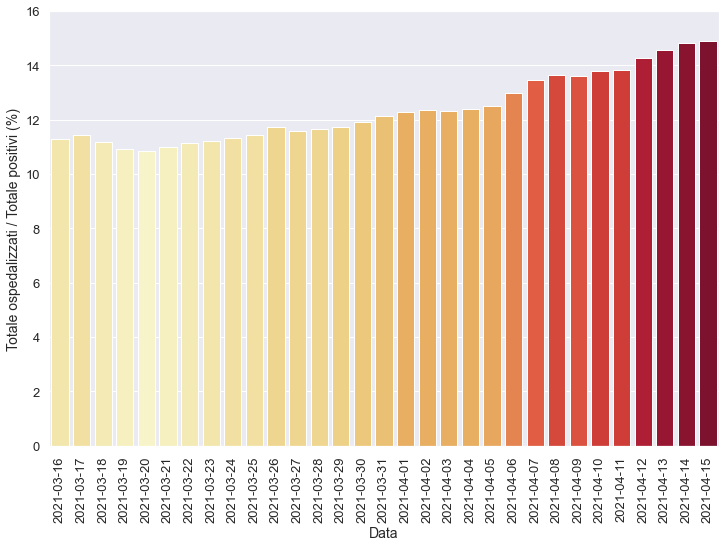

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

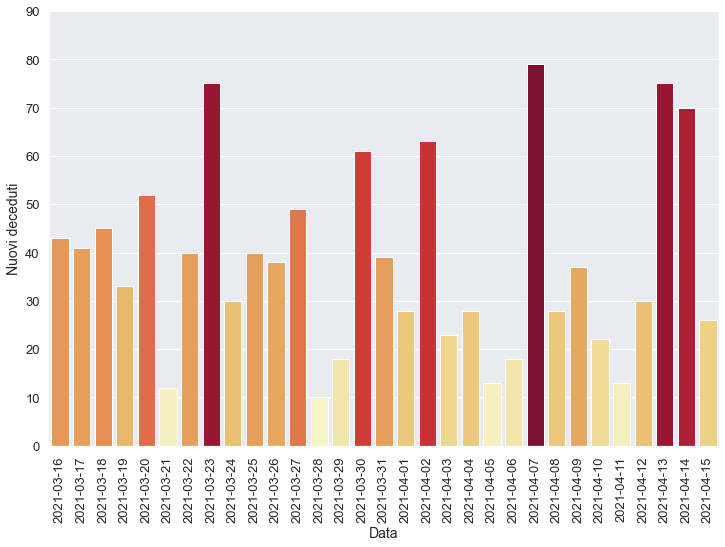

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

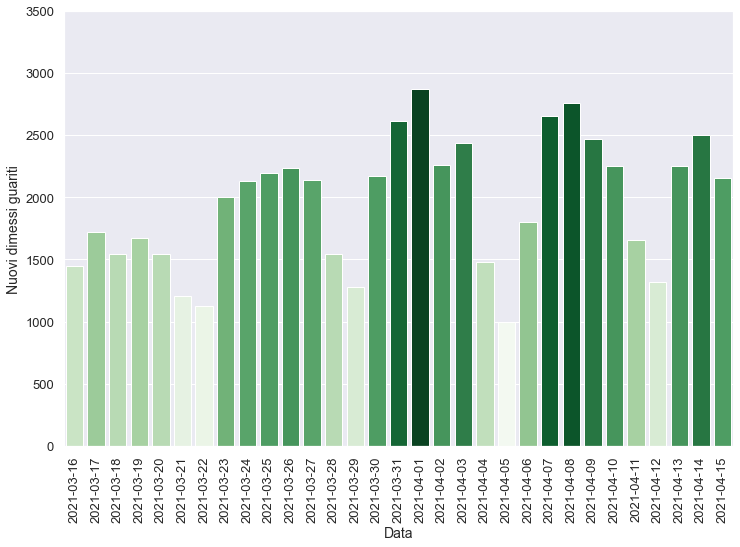

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-04-08T17:00:00,1,Piemonte,3800,346,4146,26247,30393,-1129,1661,...,28.0,24811.0,7381.0,-1029.0,8.35,13.64,6.69,22.50,-3.08,-3.58
1,2021-04-09T17:00:00,1,Piemonte,3706,329,4035,25648,29683,-710,1798,...,37.0,29218.0,7661.0,-599.0,8.15,13.59,6.15,23.47,-4.91,-2.34
2,2021-04-10T17:00:00,1,Piemonte,3633,324,3957,24716,28673,-1010,1267,...,22.0,28927.0,7293.0,-932.0,8.19,13.80,4.38,17.37,-1.52,-3.40
3,2021-04-11T17:00:00,1,Piemonte,3606,320,3926,24446,28372,-301,1372,...,13.0,15834.0,5510.0,-270.0,8.15,13.84,8.66,24.90,-1.23,-1.05
4,2021-04-12T17:00:00,1,Piemonte,3633,317,3950,23711,27661,-711,636,...,30.0,13583.0,3021.0,-735.0,8.03,14.28,4.68,21.05,-0.94,-2.51
5,2021-04-13T17:00:00,1,Piemonte,3526,316,3842,22547,26389,-1272,1057,...,75.0,22670.0,6886.0,-1164.0,8.22,14.56,4.66,15.35,-0.32,-4.60
6,2021-04-14T17:00:00,1,Piemonte,3430,311,3741,21517,25258,-1131,1439,...,70.0,21986.0,7027.0,-1030.0,8.31,14.81,6.55,20.48,-1.58,-4.29
7,2021-04-15T17:00:00,1,Piemonte,3312,311,3623,20718,24341,-917,1264,...,26.0,21579.0,6301.0,-799.0,8.58,14.88,5.86,20.06,0.00,-3.63


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

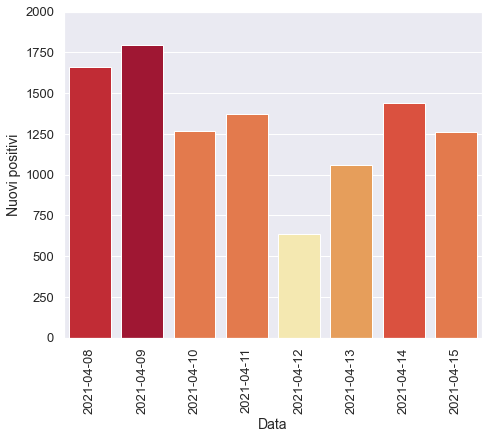

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

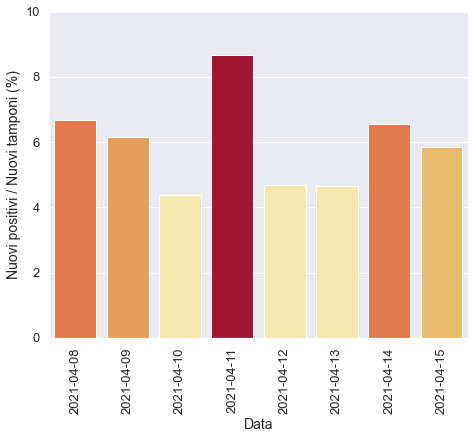

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

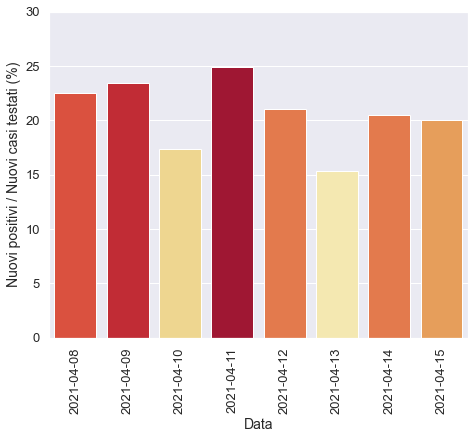

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

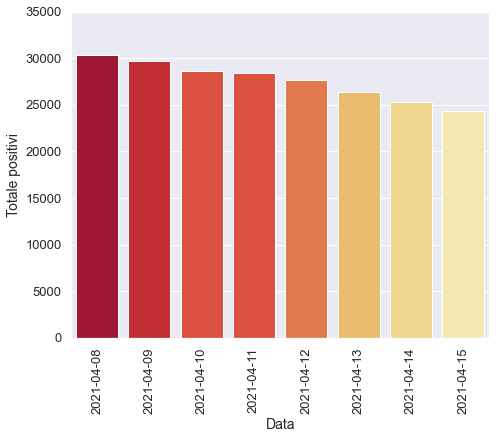

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

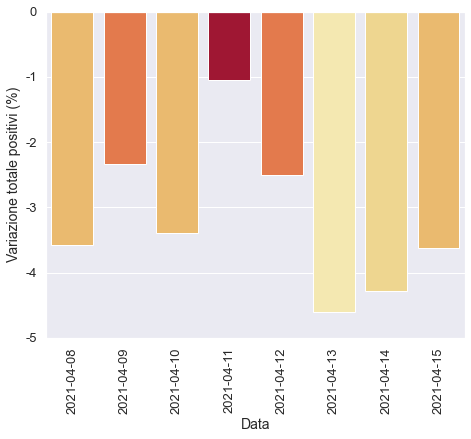

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

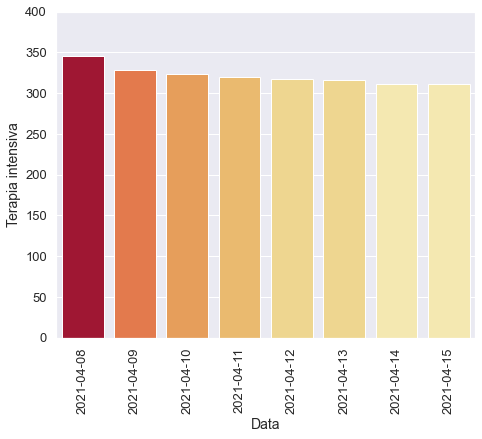

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

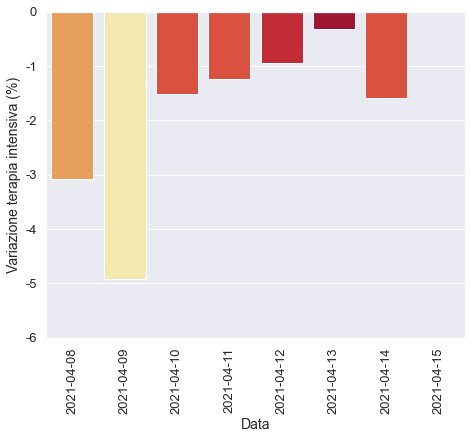

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

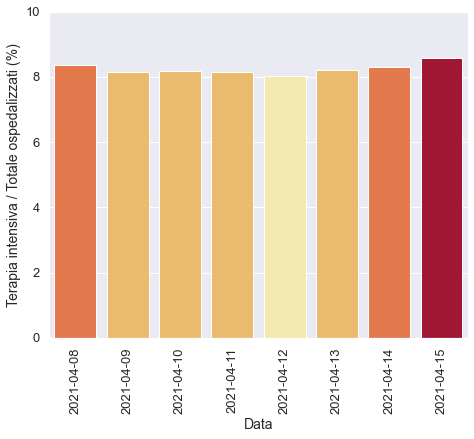

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

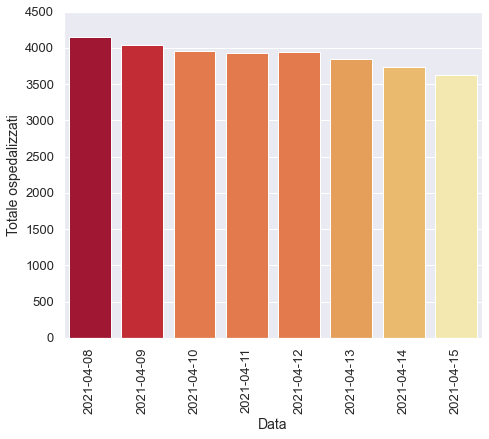

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

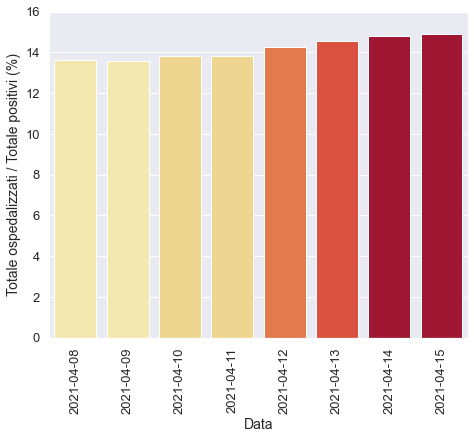

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

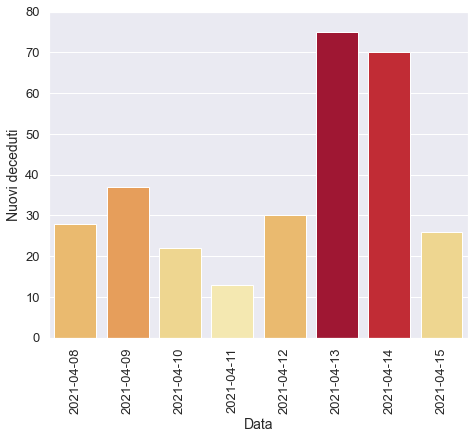

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

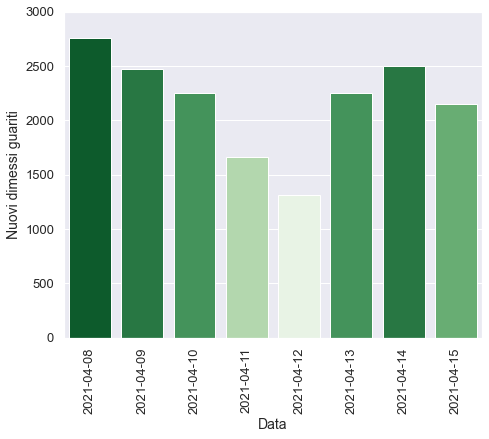

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)